#### **Machine Learning Project**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv('dataset.csv')
print(df.head())

        alias                      username  \
0  1misssmeis  Sylvie Meis Official Account   
1  1misssmeis  Sylvie Meis Official Account   
2  1misssmeis  Sylvie Meis Official Account   
3      3ala2o                  Alaa Ebrahim   
4      3ala2o                  Alaa Ebrahim   

                                  descriptionProfile  \
0  ["TV Host Let's Dance for RTL Germany / SBS6 /...   
1  ["TV Host Let's Dance for RTL Germany / SBS6 /...   
2  ["TV Host Let's Dance for RTL Germany / SBS6 /...   
3  ['Youtuber/Gamer/Vlogger/Business owner . Snap...   
4  ['Youtuber/Gamer/Vlogger/Business owner . Snap...   

                               website  numberPosts  numberFollowers  \
0                    www.sylviemeis.de          988           720979   
1                    www.sylviemeis.de          988           720979   
2                    www.sylviemeis.de          988           720979   
3  www.youtube.com/watch?v=MXkqzeIlhSQ          938           792886   
4  www.youtube.com/w

In [ ]:
df.shape

(1580, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   alias               1580 non-null   object 
 1   username            1556 non-null   object 
 2   descriptionProfile  1562 non-null   object 
 3   website             1438 non-null   object 
 4   numberPosts         1580 non-null   int64  
 5   numberFollowers     1580 non-null   int64  
 6   numberFollowing     1580 non-null   int64  
 7   private             1580 non-null   bool   
 8   isVideo             1580 non-null   bool   
 9   multipleImage       1580 non-null   bool   
 10  tags                1580 non-null   object 
 11  mentions            1580 non-null   object 
 12  description         1563 non-null   object 
 13  localization        676 non-null    object 
 14  date                1580 non-null   object 
 15  numberLikes         1580 non-null   int64  
 16  filena

In [ ]:
df['captionLength'] = df.apply(lambda row: len(str(row.description)), axis=1)
df['numTags'] = df.apply(lambda row: len(row.tags), axis=1)
df['numMentions'] = df.apply(lambda row: len(row.mentions), axis=1)
df['followerFollowingRatio'] = df['numberFollowing']/df['numberFollowers']
df['interaction'] = (df['avgPrevious10Likes']/df['numberFollowers'])*100
df['localization'].fillna(0, inplace=True)
df['localization'] = df['localization'].astype(bool)
df['localization'] = df['localization'].astype(int)
df['username'].fillna(0, inplace=True)
df['username'] = df['username'].astype(bool)
df['username'] = df['username'].astype(int)
df['website'].fillna(0, inplace=True)
df['website'] = df['website'].astype(bool)
df['website'] = df['website'].astype(int)
df['descriptionProfile'].fillna(0, inplace=True)
df['descriptionProfile'] = df['descriptionProfile'].astype(bool)
df['descriptionProfile'] = df['descriptionProfile'].astype(int)
df['description'].fillna(0, inplace=True)
df['captionPresent'] = df['description'].astype(bool)
df['captionPresent'] = df['captionPresent'].astype(int)
df

,alias,username,descriptionProfile,website,numberPosts,numberFollowers,numberFollowing,private,isVideo,multipleImage,...,stdPrevious10Likes,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly,captionLength,numTags,numMentions,followerFollowingRatio,interaction,captionPresent
0,1misssmeis,1,1,1,988,720979,233,False,False,False,...,8586.574056,13742.00,5156.535691,5.526025,184,37,48,0.000323,2.757576,1
1,1misssmeis,1,1,1,988,720979,233,False,False,False,...,7503.863008,12386.75,5161.117838,5.666397,121,20,124,0.000323,2.465158,1
2,1misssmeis,1,1,1,988,720979,233,False,False,False,...,9014.520102,13455.00,5818.683958,5.333079,153,31,105,0.000323,2.706888,1
3,3ala2o,1,1,1,938,792886,466,False,False,False,...,3214.840665,5660.75,3003.871557,2.233995,2,2,2,0.000588,1.124947,1
4,3ala2o,1,1,1,938,792886,466,False,False,False,...,2948.003884,5195.75,1941.644750,2.113168,139,15,14,0.000588,1.160513,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,nadiadamaso_ebnl,1,1,1,1041,171865,868,False,False,False,...,749.727091,2642.25,1080.034722,5.894427,189,68,2,0.005050,1.600834,1
1576,nadia_mejia,1,1,1,1481,227691,402,False,False,False,...,3248.541226,3297.50,1938.017630,9.153142,62,2,34,0.001766,2.824043,1
1577,nadia_mejia,1,1,1,1481,227691,402,False,False,False,...,2679.747876,5486.50,2413.491316,8.749271,18,2,2,0.001766,3.128922,1
1578,nadia_mejia,1,1,1,1481,227691,402,False,False,False,...,3209.172382,3508.50,2160.358998,8.614722,112,2,30,0.001766,2.961110,1


In [ ]:
from datetime import datetime
#add features for month and weekday of post
df['weekday'] = df.apply(lambda row: datetime.strptime(row.date[:10], "%Y-%m-%d").weekday(), axis=1) 
df

,alias,username,descriptionProfile,website,numberPosts,numberFollowers,numberFollowing,private,isVideo,multipleImage,...,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly,captionLength,numTags,numMentions,followerFollowingRatio,interaction,captionPresent,weekday
0,1misssmeis,1,1,1,988,720979,233,False,False,False,...,13742.00,5156.535691,5.526025,184,37,48,0.000323,2.757576,1,3
1,1misssmeis,1,1,1,988,720979,233,False,False,False,...,12386.75,5161.117838,5.666397,121,20,124,0.000323,2.465158,1,5
2,1misssmeis,1,1,1,988,720979,233,False,False,False,...,13455.00,5818.683958,5.333079,153,31,105,0.000323,2.706888,1,5
3,3ala2o,1,1,1,938,792886,466,False,False,False,...,5660.75,3003.871557,2.233995,2,2,2,0.000588,1.124947,1,1
4,3ala2o,1,1,1,938,792886,466,False,False,False,...,5195.75,1941.644750,2.113168,139,15,14,0.000588,1.160513,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,nadiadamaso_ebnl,1,1,1,1041,171865,868,False,False,False,...,2642.25,1080.034722,5.894427,189,68,2,0.005050,1.600834,1,5
1576,nadia_mejia,1,1,1,1481,227691,402,False,False,False,...,3297.50,1938.017630,9.153142,62,2,34,0.001766,2.824043,1,6
1577,nadia_mejia,1,1,1,1481,227691,402,False,False,False,...,5486.50,2413.491316,8.749271,18,2,2,0.001766,3.128922,1,5
1578,nadia_mejia,1,1,1,1481,227691,402,False,False,False,...,3508.50,2160.358998,8.614722,112,2,30,0.001766,2.961110,1,6


In [ ]:
df.describe()

,username,descriptionProfile,website,numberPosts,numberFollowers,numberFollowing,localization,numberLikes,avgPrevious10Likes,stdPrevious10Likes,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly,captionLength,numTags,numMentions,followerFollowingRatio,interaction,captionPresent,weekday
count,1580.000000,1580.000000,1580.000000,1580.000000,1.580000e+03,1.580000e+03,1580.000000,1.580000e+03,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,0.984810,0.988608,0.910127,2399.929747,9.628445e+05,4.038717e+03,0.427848,2.455093e+04,23245.444599,7242.606162,19114.554114,6580.111969,223.585107,228.773418,38.621519,49.693038,0.014601,2.178896,0.989241,4.308228
std,0.122346,0.106159,0.286091,2685.893553,1.832873e+06,8.004086e+04,0.494923,7.335487e+04,65562.526439,17305.444454,54698.189863,18738.234410,4883.157245,315.603622,75.753256,71.419641,0.295232,1.785469,0.103201,1.812086
min,0.000000,0.000000,0.000000,49.000000,1.249650e+05,0.000000e+00,0.000000,0.000000e+00,315.000000,53.950183,212.000000,10.214369,-0.006146,1.000000,2.000000,2.000000,0.000000,0.155458,0.000000,0.000000
25%,1.000000,1.000000,1.000000,846.000000,1.982870e+05,1.900000e+02,0.000000,2.924750e+03,3115.454545,1053.023093,2467.375000,655.612563,3.499883,46.750000,2.000000,2.000000,0.000294,1.026036,1.000000,3.000000
50%,1.000000,1.000000,1.000000,1599.000000,3.901330e+05,4.050000e+02,0.000000,6.741000e+03,6713.181818,2100.952376,5364.875000,1721.332153,6.221877,117.500000,13.000000,29.000000,0.000849,1.640360,1.000000,5.000000
75%,1.000000,1.000000,1.000000,3032.000000,8.911860e+05,6.600000e+02,1.000000,1.750075e+04,16728.272727,5296.214370,13592.437500,4508.854801,11.898810,279.250000,41.000000,62.000000,0.002220,2.814846,1.000000,6.000000
max,1.000000,1.000000,1.000000,27671.000000,2.213073e+07,1.838511e+06,1.000000,1.063239e+06,820958.545455,184027.880587,696524.500000,314925.121968,119000.000000,2212.000000,606.000000,1037.000000,6.781096,15.688675,1.000000,6.000000


In [ ]:
df['numberLikes'] = df['numberLikes'] /df['numberLikes'].abs().max()

In [ ]:
df.describe()

,username,descriptionProfile,website,numberPosts,numberFollowers,numberFollowing,localization,numberLikes,avgPrevious10Likes,stdPrevious10Likes,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly,captionLength,numTags,numMentions,followerFollowingRatio,interaction,captionPresent,weekday
count,1580.000000,1580.000000,1580.000000,1580.000000,1.580000e+03,1.580000e+03,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,0.984810,0.988608,0.910127,2399.929747,9.628445e+05,4.038717e+03,0.427848,0.023091,23245.444599,7242.606162,19114.554114,6580.111969,223.585107,228.773418,38.621519,49.693038,0.014601,2.178896,0.989241,4.308228
std,0.122346,0.106159,0.286091,2685.893553,1.832873e+06,8.004086e+04,0.494923,0.068992,65562.526439,17305.444454,54698.189863,18738.234410,4883.157245,315.603622,75.753256,71.419641,0.295232,1.785469,0.103201,1.812086
min,0.000000,0.000000,0.000000,49.000000,1.249650e+05,0.000000e+00,0.000000,0.000000,315.000000,53.950183,212.000000,10.214369,-0.006146,1.000000,2.000000,2.000000,0.000000,0.155458,0.000000,0.000000
25%,1.000000,1.000000,1.000000,846.000000,1.982870e+05,1.900000e+02,0.000000,0.002751,3115.454545,1053.023093,2467.375000,655.612563,3.499883,46.750000,2.000000,2.000000,0.000294,1.026036,1.000000,3.000000
50%,1.000000,1.000000,1.000000,1599.000000,3.901330e+05,4.050000e+02,0.000000,0.006340,6713.181818,2100.952376,5364.875000,1721.332153,6.221877,117.500000,13.000000,29.000000,0.000849,1.640360,1.000000,5.000000
75%,1.000000,1.000000,1.000000,3032.000000,8.911860e+05,6.600000e+02,1.000000,0.016460,16728.272727,5296.214370,13592.437500,4508.854801,11.898810,279.250000,41.000000,62.000000,0.002220,2.814846,1.000000,6.000000
max,1.000000,1.000000,1.000000,27671.000000,2.213073e+07,1.838511e+06,1.000000,1.000000,820958.545455,184027.880587,696524.500000,314925.121968,119000.000000,2212.000000,606.000000,1037.000000,6.781096,15.688675,1.000000,6.000000


In [ ]:
df = df.loc[df['avgPostsWeekly'] >= 0]
df = df.drop(columns=['username', 'descriptionProfile', 'localization', 'followerFollowingRatio'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 815
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   alias               815 non-null    object 
 1   website             815 non-null    int64  
 2   numberPosts         815 non-null    int64  
 3   numberFollowers     815 non-null    int64  
 4   numberFollowing     815 non-null    int64  
 5   private             815 non-null    bool   
 6   isVideo             815 non-null    bool   
 7   multipleImage       815 non-null    bool   
 8   tags                815 non-null    object 
 9   mentions            815 non-null    object 
 10  description         815 non-null    object 
 11  date                815 non-null    object 
 12  numberLikes         815 non-null    int64  
 13  filename            815 non-null    object 
 14  avgPrevious10Likes  815 non-null    float64
 15  stdPrevious10Likes  815 non-null    float64
 16  avgPrevi

No missing values that are important. 

<Figure size 1440x1440 with 0 Axes>

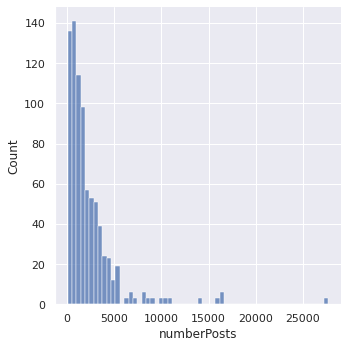

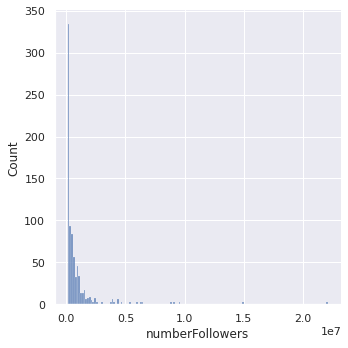

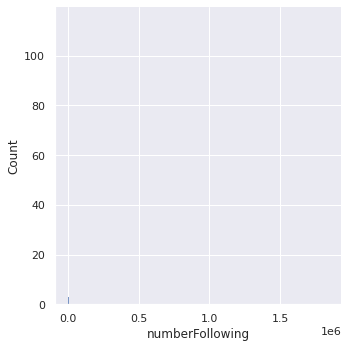

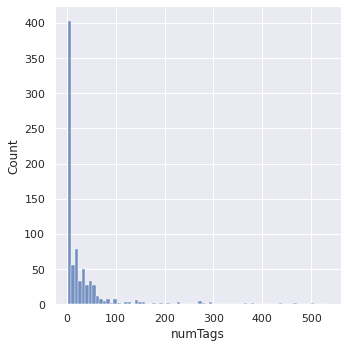

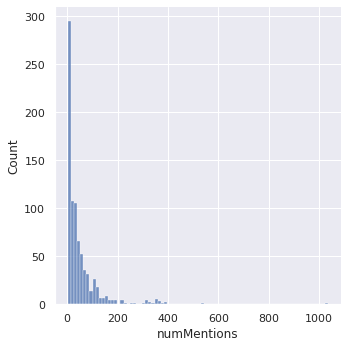

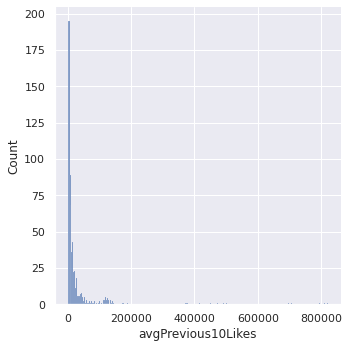

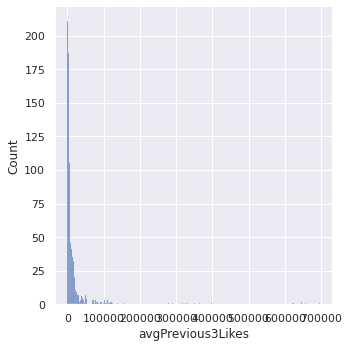

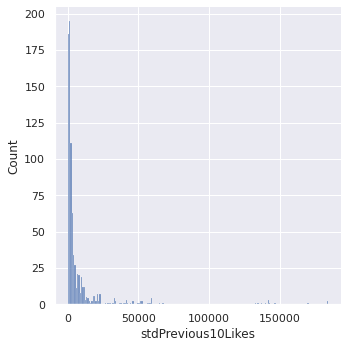

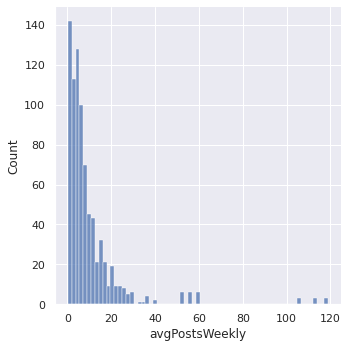

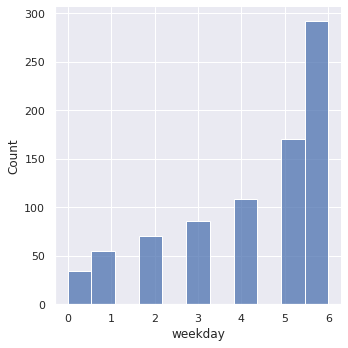

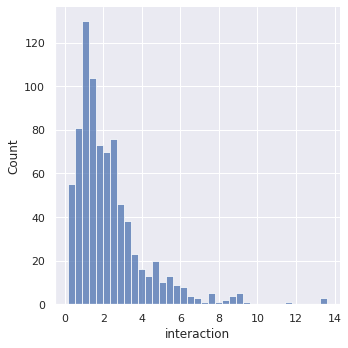

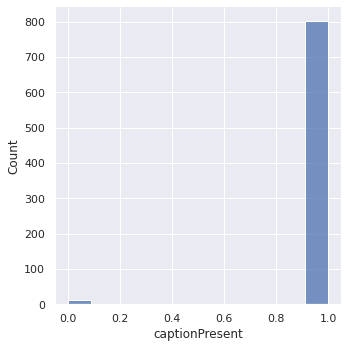

In [ ]:
#Visualizations
plt.figure(figsize=(20,20))

sns.displot(df, x="numberPosts")
sns.displot(df, x="numberFollowers")
sns.displot(df, x="numberFollowing")
sns.displot(df, x="numTags")
sns.displot(df, x="numMentions")
sns.displot(df, x="avgPrevious10Likes")
sns.displot(df, x="avgPrevious3Likes")
sns.displot(df, x="stdPrevious10Likes")
sns.displot(df, x="avgPostsWeekly")
sns.displot(df, x="weekday")
sns.displot(df, x="interaction")
sns.displot(df, x="captionPresent")


<Figure size 3600x1440 with 0 Axes>

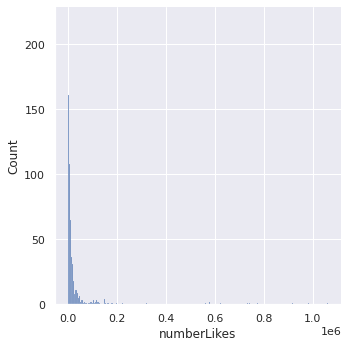

In [ ]:
plt.figure(figsize=(50,20))
sns.displot(df, x="numberLikes")

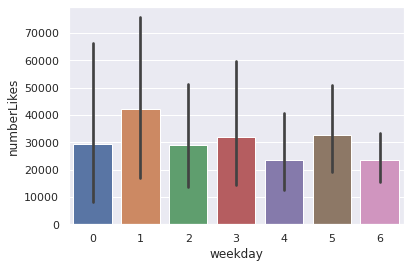

In [ ]:
sns.barplot(x="weekday", y="numberLikes", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


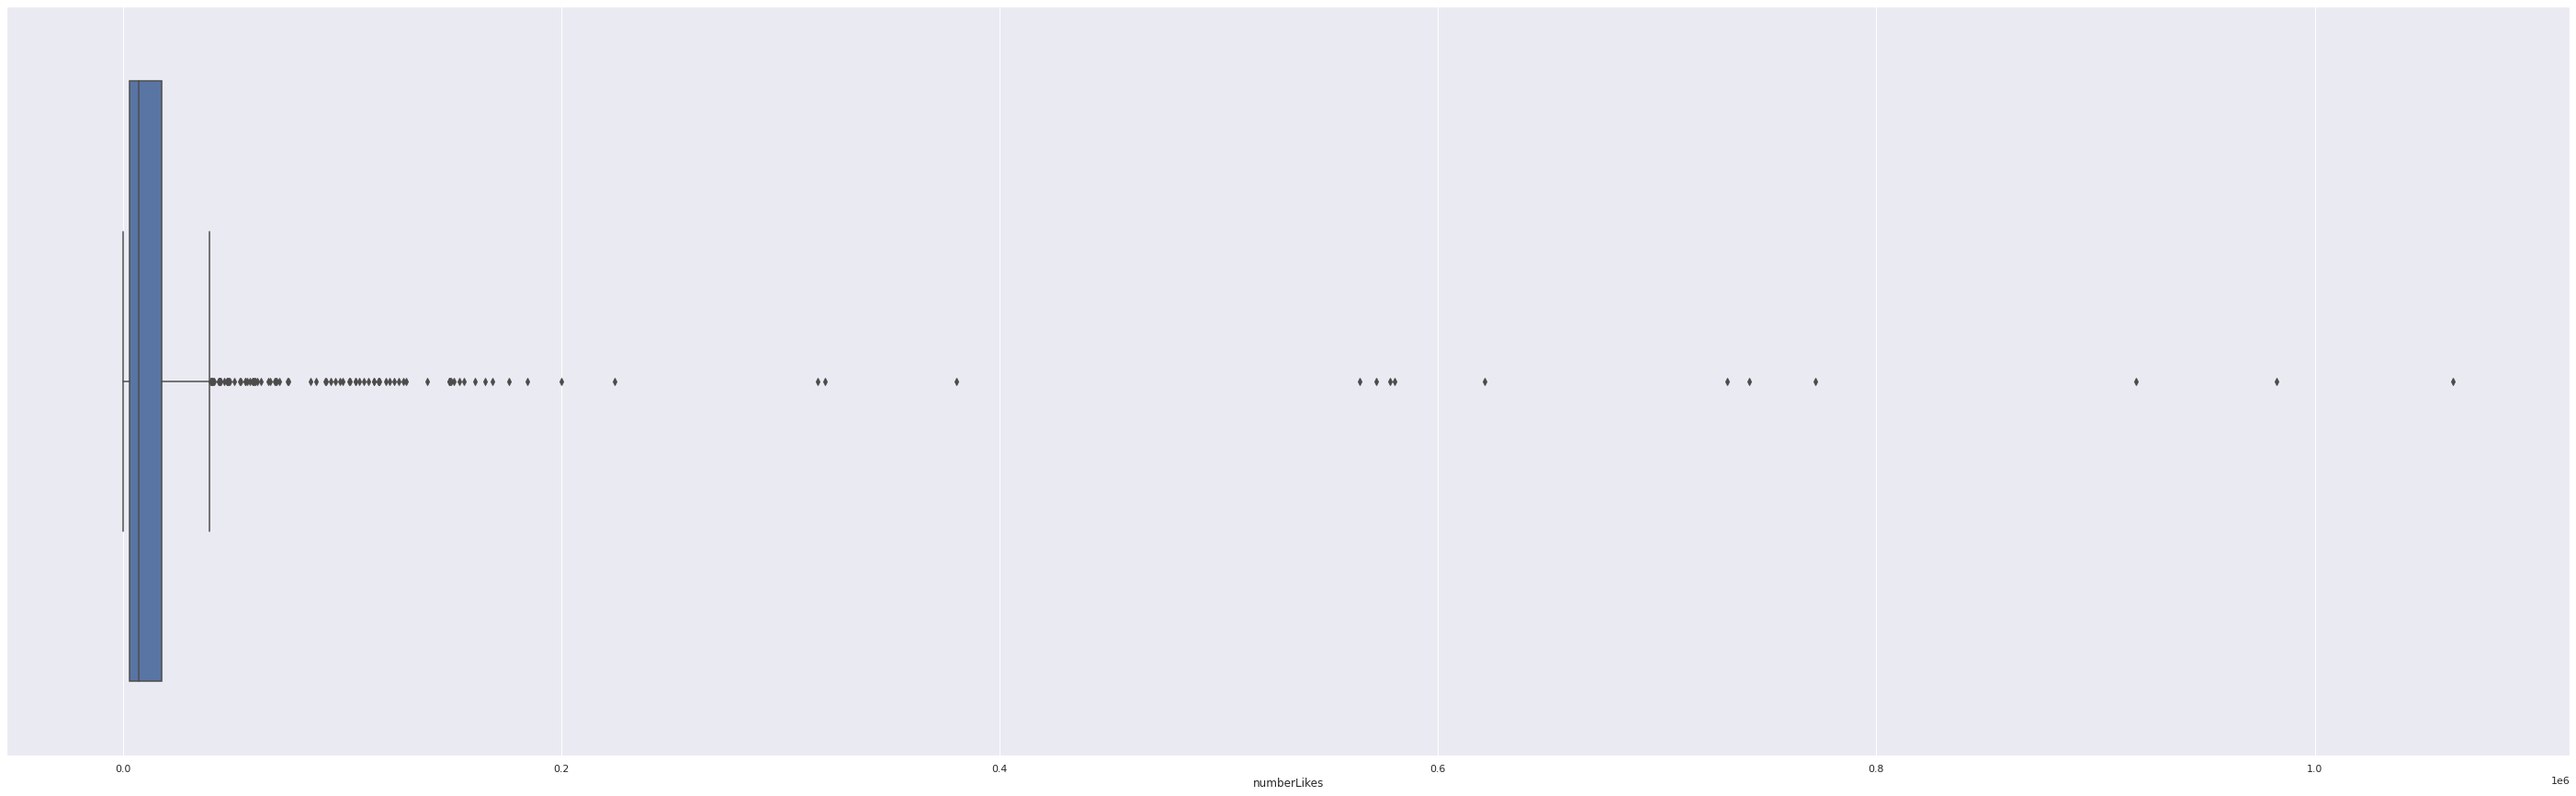

In [ ]:
plt.figure(figsize=(50,15))
sns.boxplot(df['numberLikes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


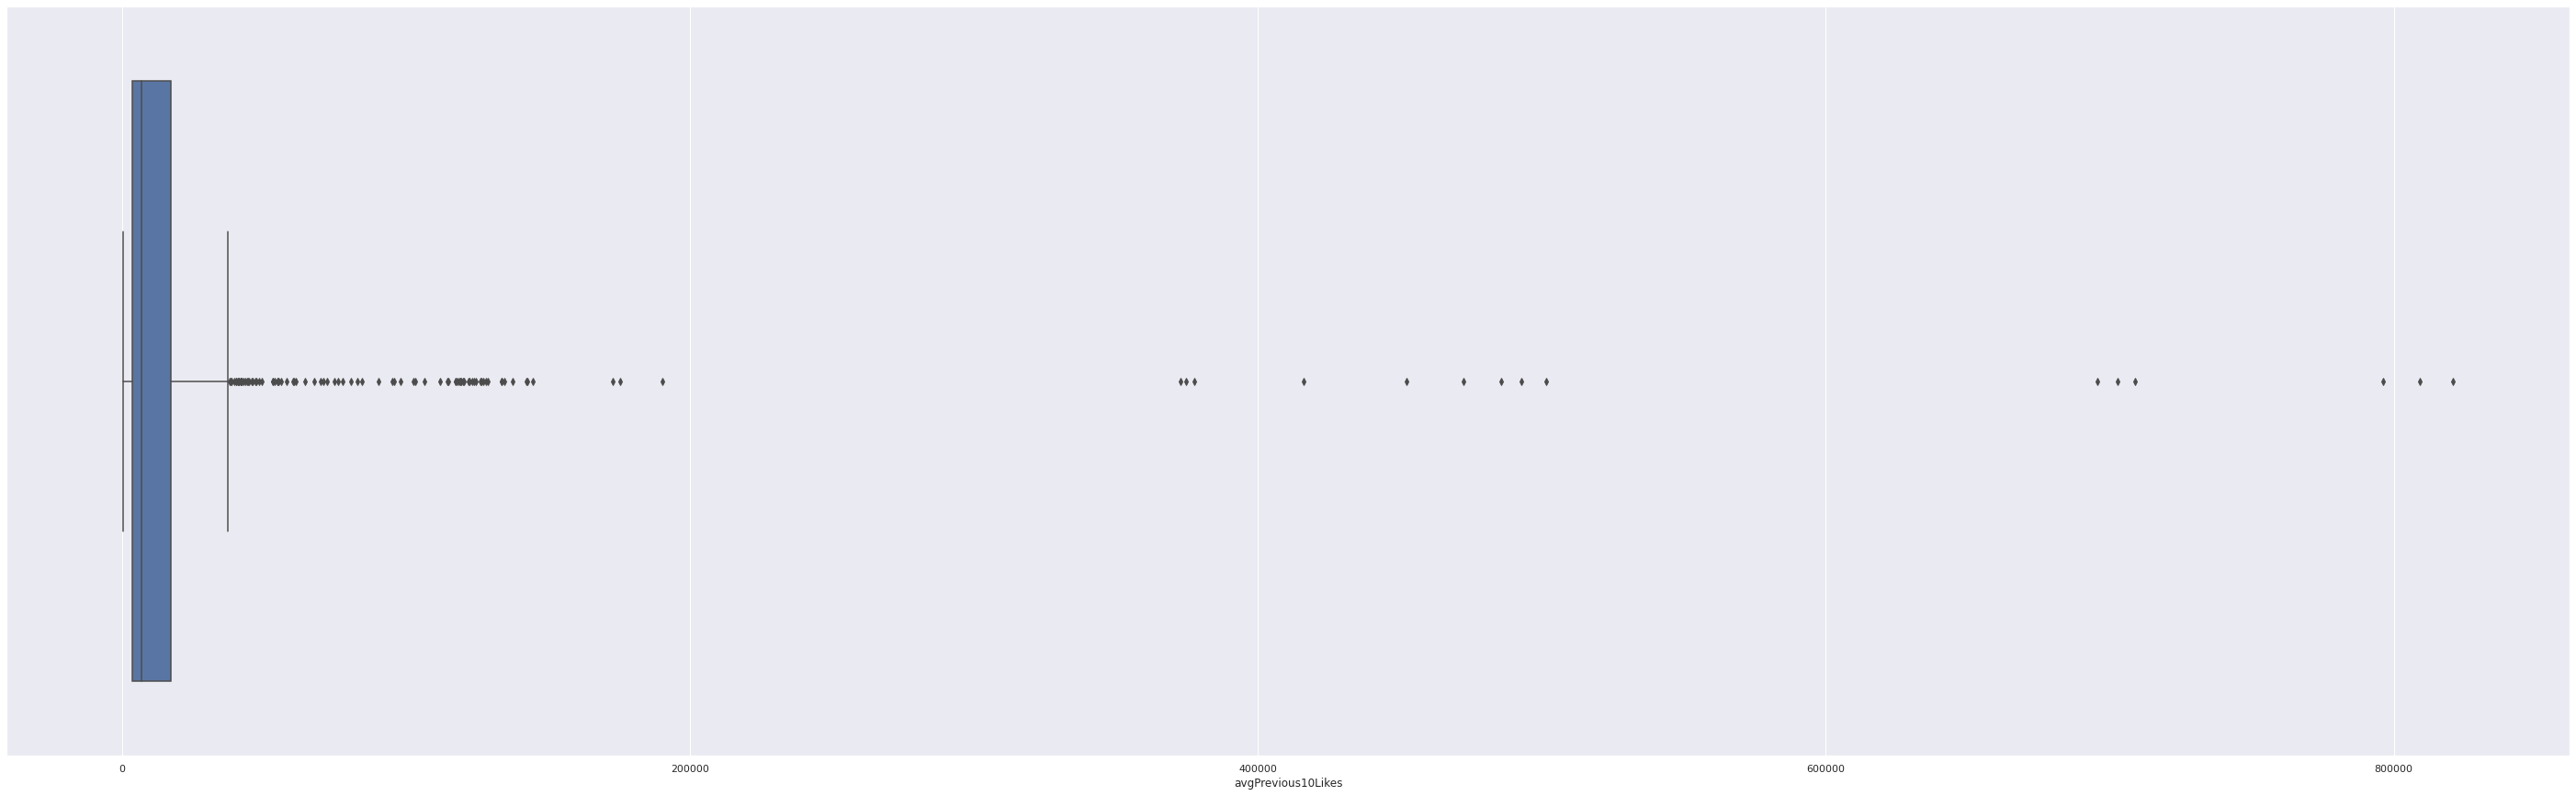

In [ ]:
plt.figure(figsize=(50,15))
sns.boxplot(df['avgPrevious10Likes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


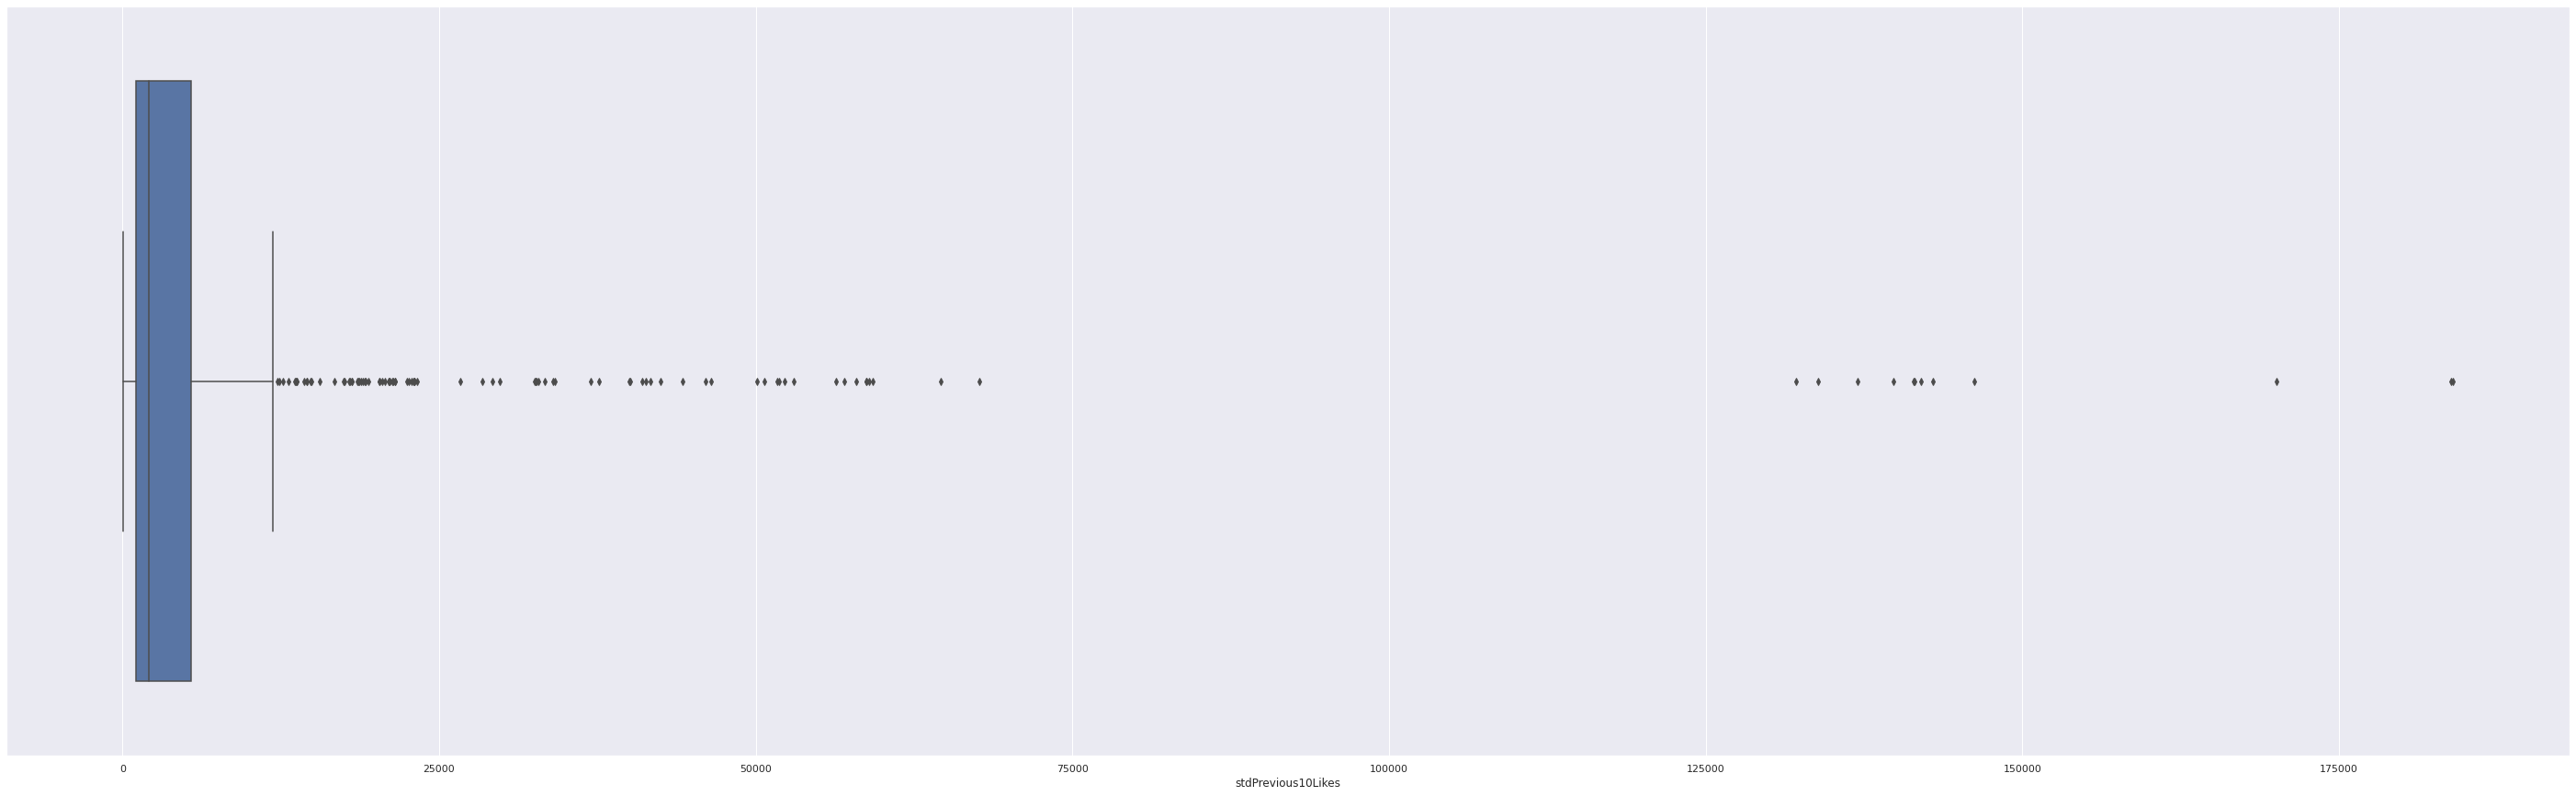

In [ ]:
plt.figure(figsize=(50,15))
sns.boxplot(df['stdPrevious10Likes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


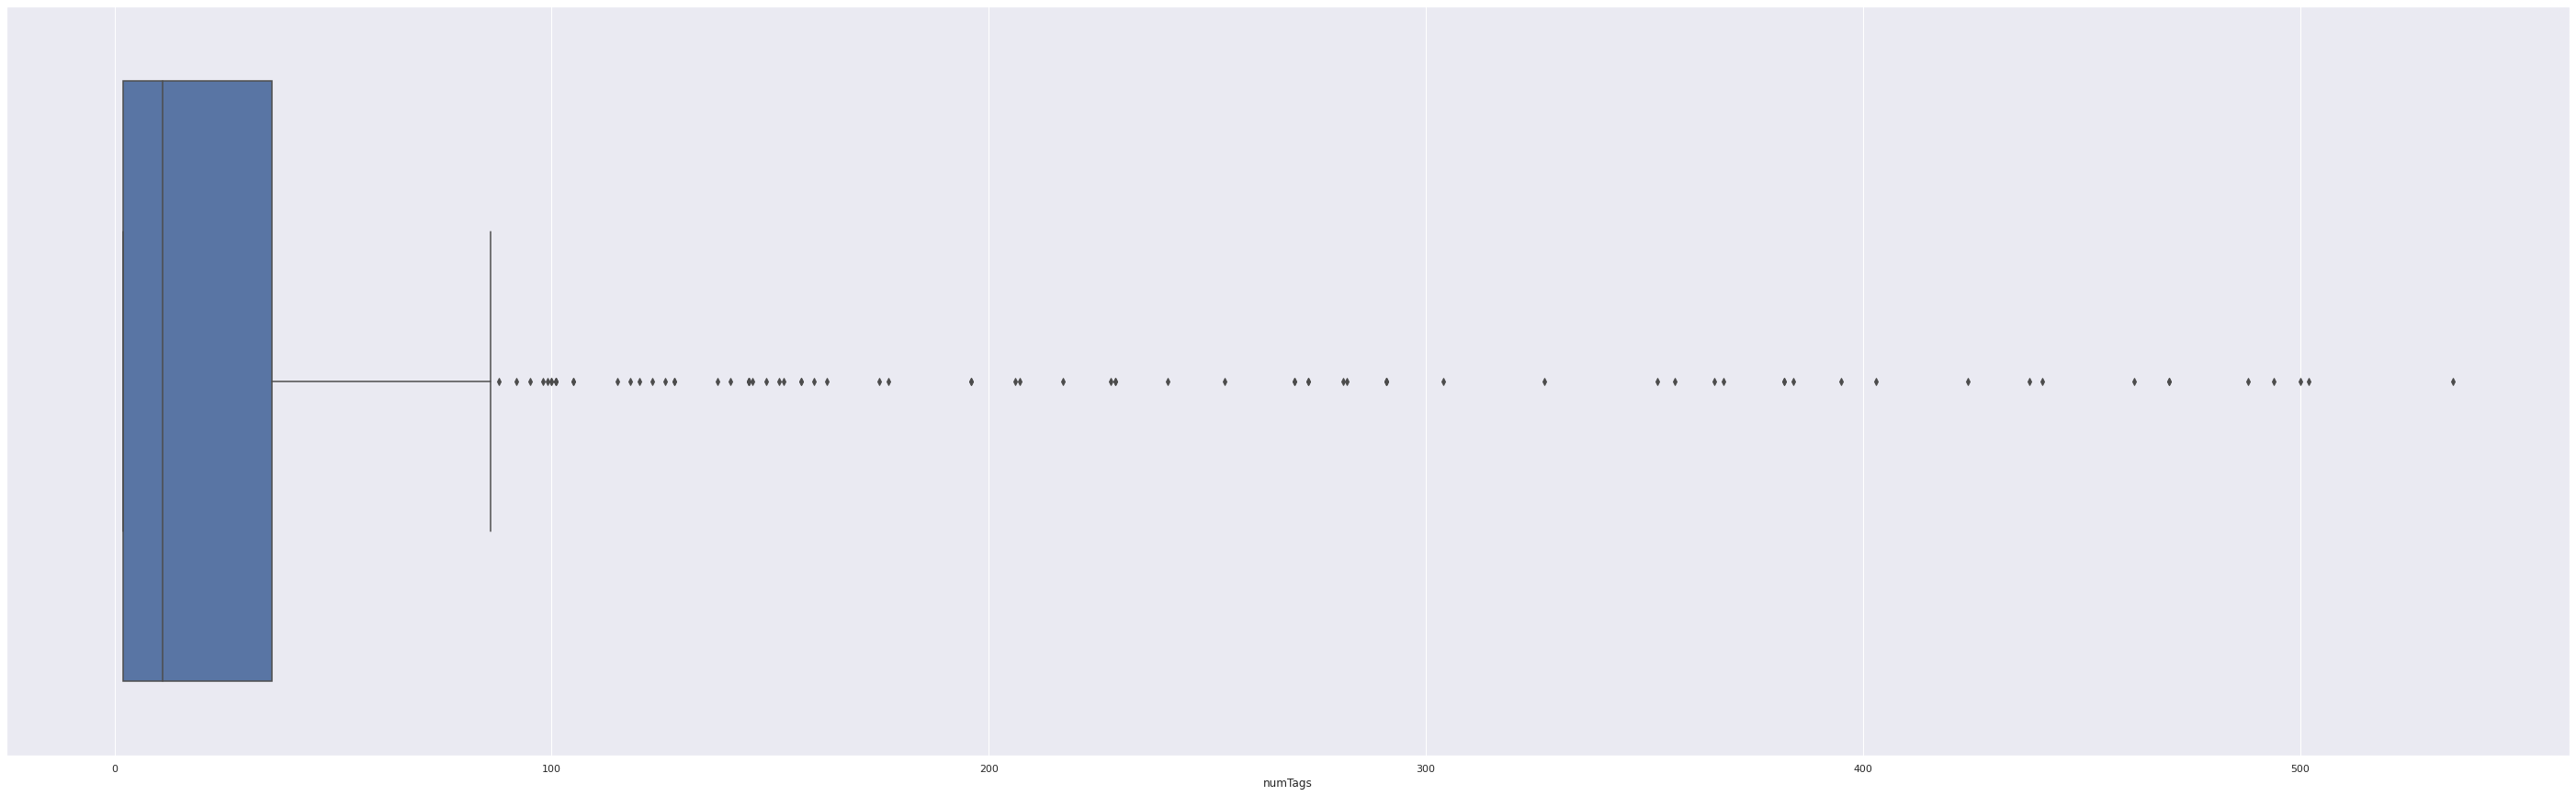

In [ ]:
plt.figure(figsize=(50,15))
sns.boxplot(df['numTags'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


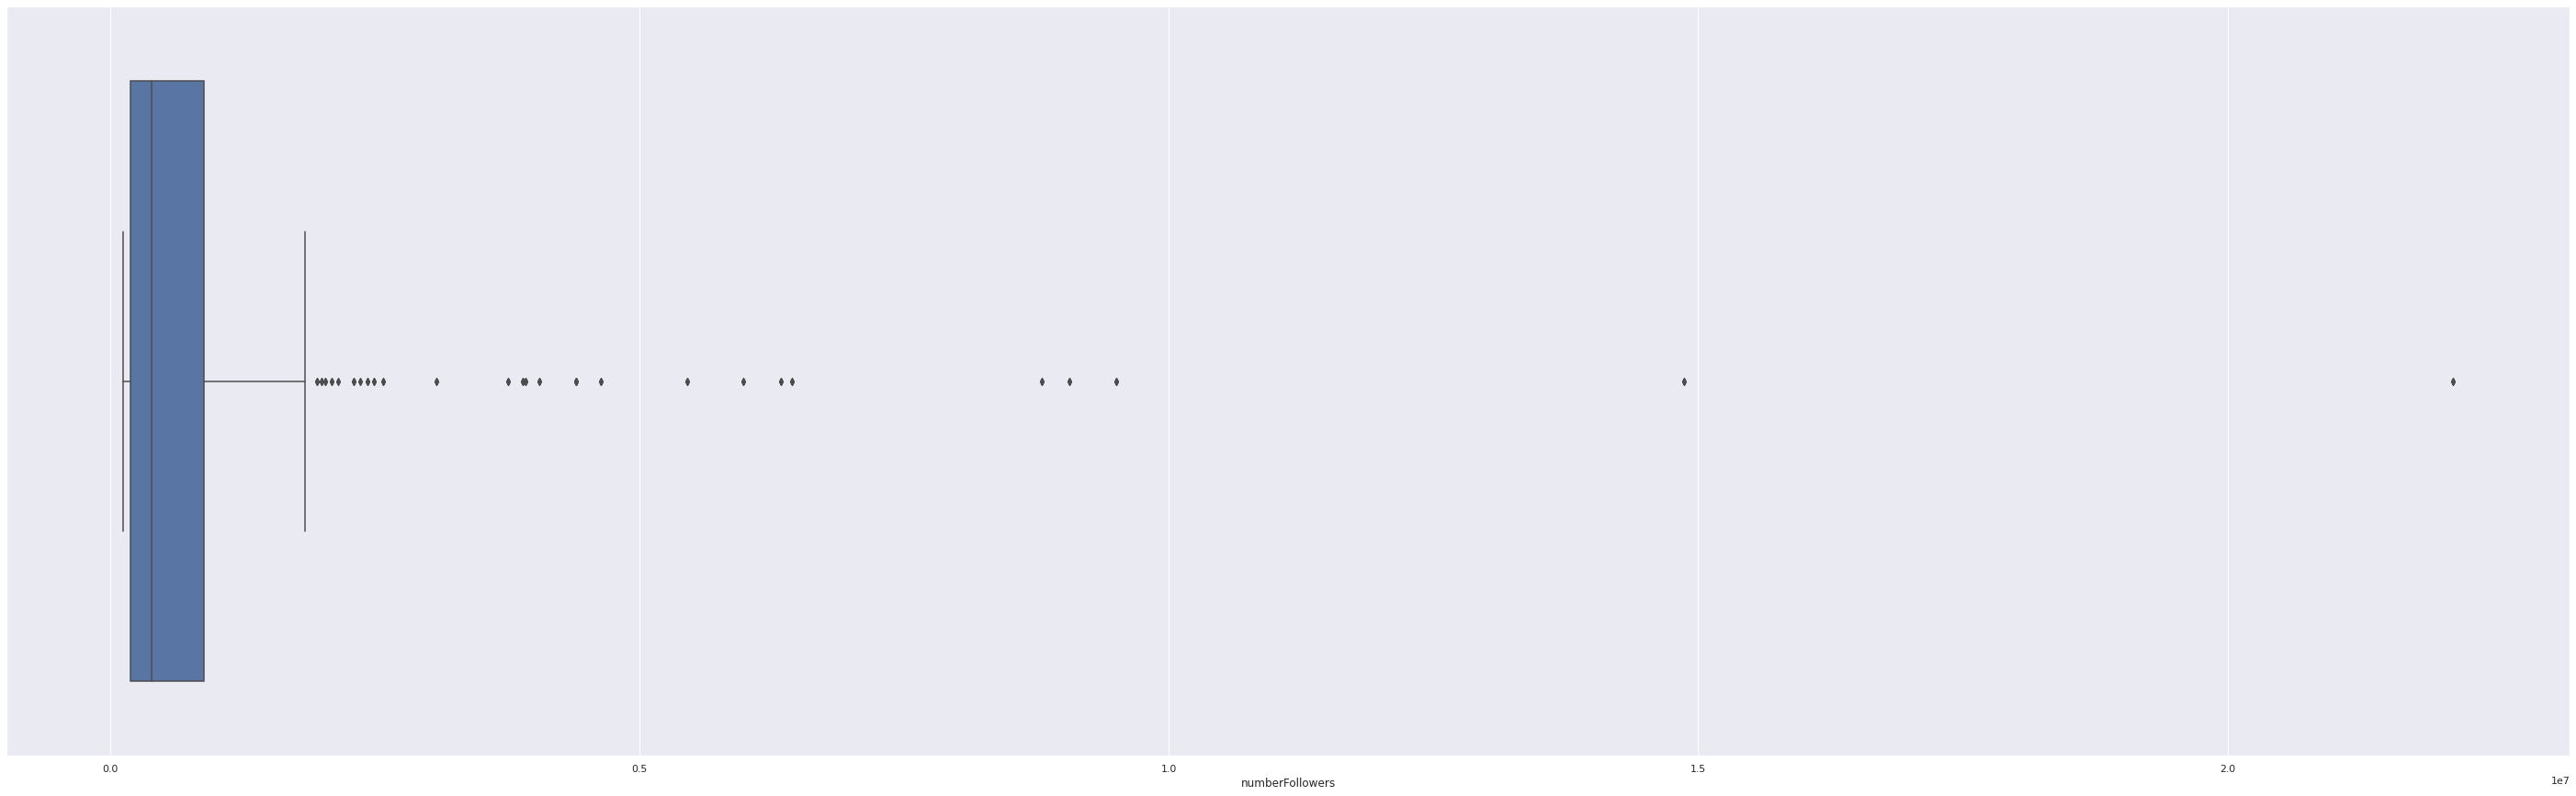

In [ ]:
plt.figure(figsize=(50,15))
sns.boxplot(df['numberFollowers'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


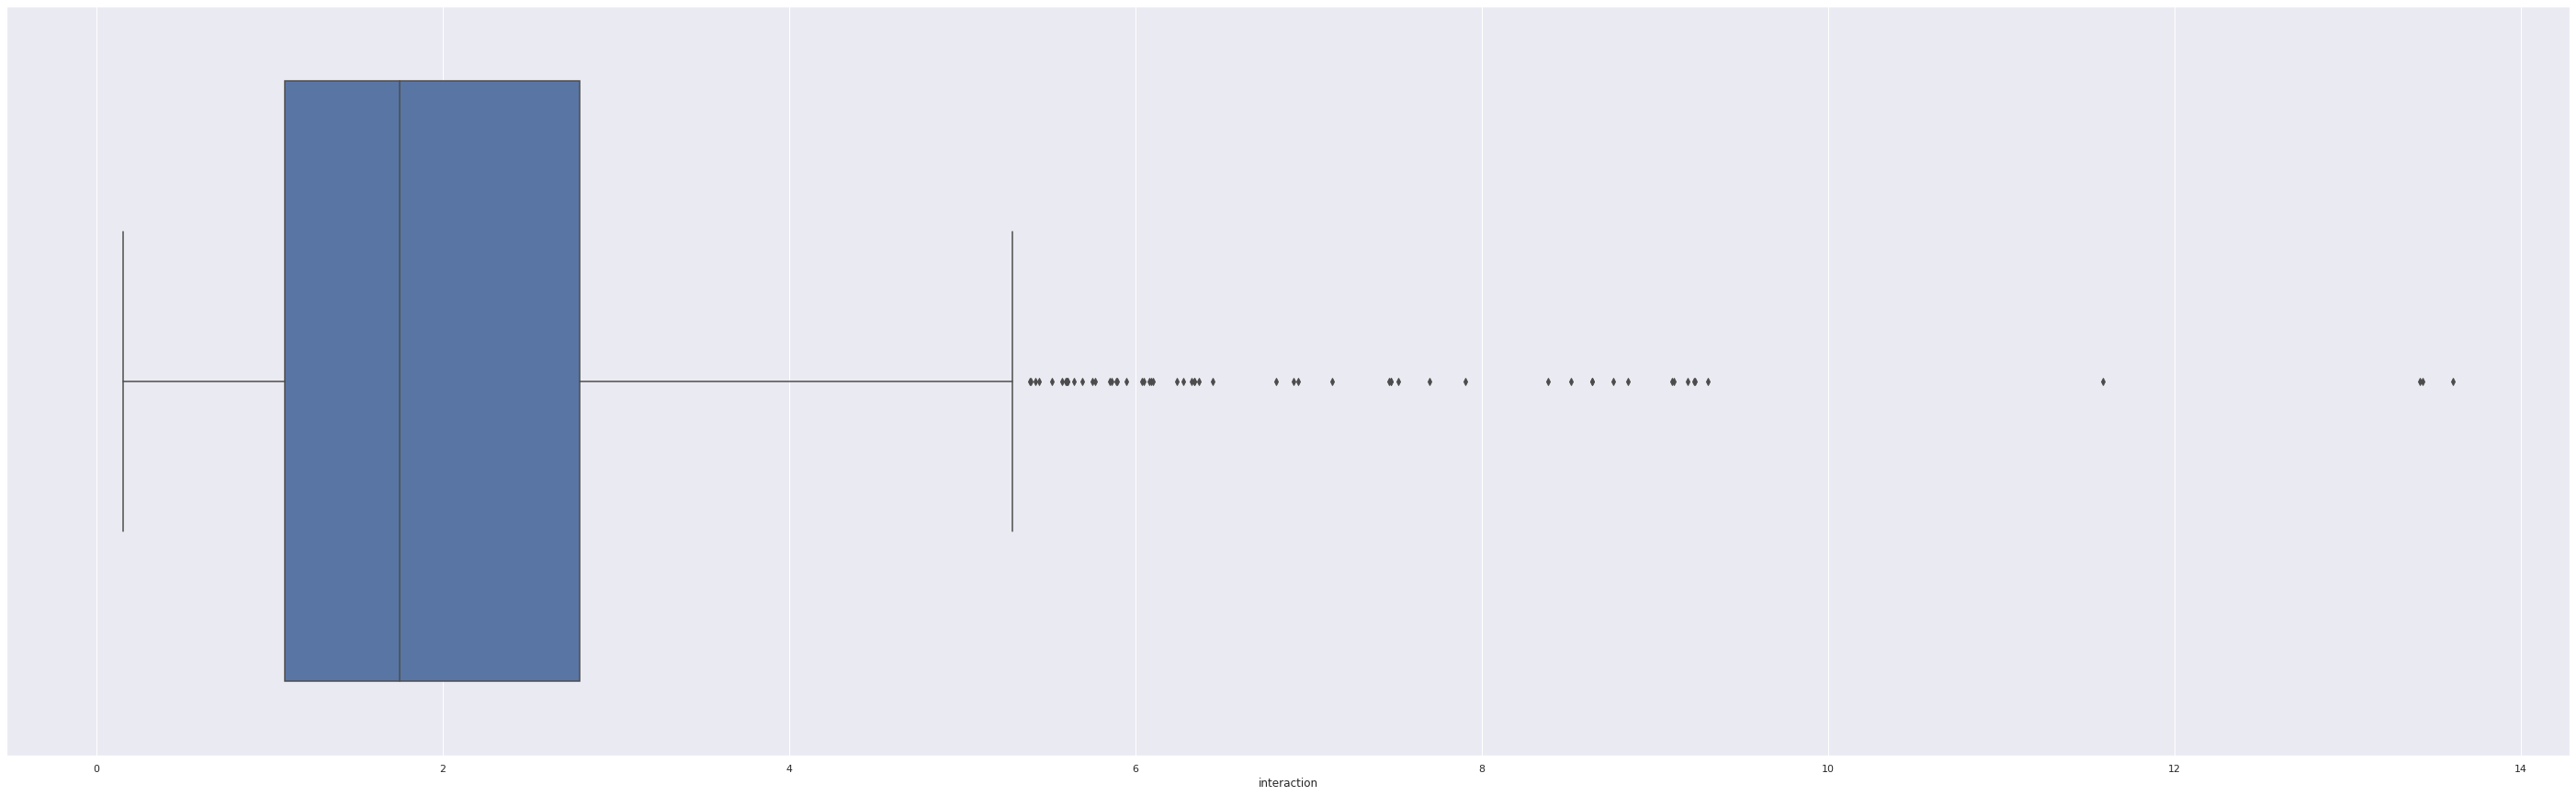

In [ ]:
plt.figure(figsize=(50,15))
sns.boxplot(df['interaction'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


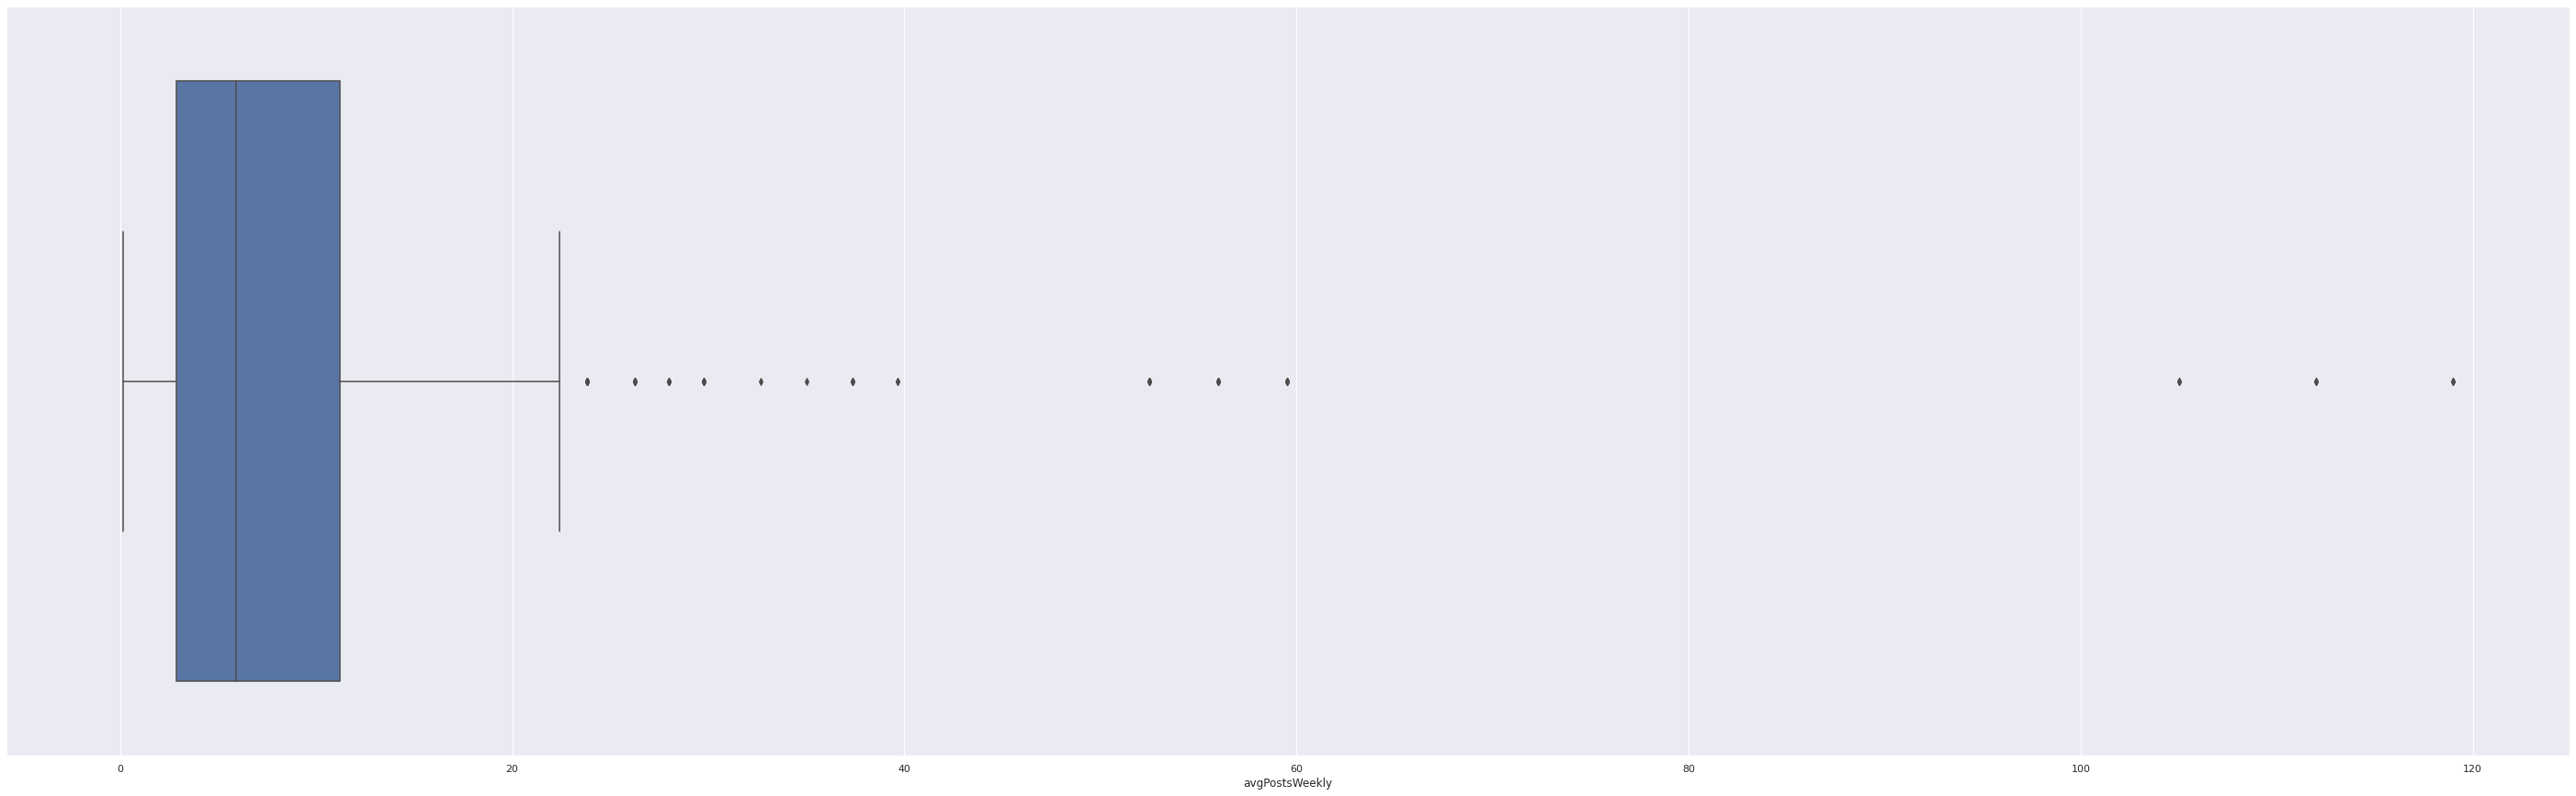

In [ ]:
plt.figure(figsize=(50,15))
sns.boxplot(df['avgPostsWeekly'])

In [ ]:
df = df.drop(columns=['private', 'isVideo', 'multipleImage'], axis=1)
df.corr()

,website,numberPosts,numberFollowers,numberFollowing,numberLikes,avgPrevious10Likes,stdPrevious10Likes,avgPrevious3Likes,stdPrevious3Likes,avgPostsWeekly,captionLength,numTags,numMentions,interaction,captionPresent,weekday
website,1.000000,0.040600,-0.070313,0.019510,-0.195139,-0.208000,-0.149772,-0.196823,-0.115482,0.012029,0.125519,0.034864,0.062712,-0.142169,0.063895,0.021588
numberPosts,0.040600,1.000000,0.231765,-0.030941,-0.027505,-0.019100,0.022140,-0.021284,0.045875,0.577556,-0.026407,0.013288,-0.040324,-0.265502,-0.026696,0.291151
numberFollowers,-0.070313,0.231765,1.000000,-0.020966,0.801652,0.797484,0.886720,0.795553,0.847480,0.143154,-0.110624,-0.103425,-0.085349,0.122473,-0.097465,0.038082
numberFollowing,0.019510,-0.030941,-0.020966,1.000000,-0.016870,-0.017737,-0.018463,-0.016458,-0.013293,0.003547,0.099406,0.341723,0.002294,-0.037403,0.007884,0.001730
numberLikes,-0.195139,-0.027505,0.801652,-0.016870,1.000000,0.959826,0.914151,0.950702,0.823954,-0.043472,-0.098725,-0.088949,-0.069561,0.370824,-0.100205,-0.036005
avgPrevious10Likes,-0.208000,-0.019100,0.797484,-0.017737,0.959826,1.000000,0.920932,0.994765,0.798892,-0.031646,-0.101821,-0.094179,-0.072929,0.414155,-0.155146,-0.015946
stdPrevious10Likes,-0.149772,0.022140,0.886720,-0.018463,0.914151,0.920932,1.000000,0.907522,0.886467,-0.011441,-0.107454,-0.097816,-0.076247,0.349610,-0.129265,-0.040008
avgPrevious3Likes,-0.196823,-0.021284,0.795553,-0.016458,0.950702,0.994765,0.907522,1.000000,0.791703,-0.034792,-0.096491,-0.092313,-0.070383,0.405314,-0.154646,-0.007859
stdPrevious3Likes,-0.115482,0.045875,0.847480,-0.013293,0.823954,0.798892,0.886467,0.791703,1.000000,-0.010669,-0.085845,-0.081462,-0.062175,0.288153,-0.056051,-0.008641
avgPostsWeekly,0.012029,0.577556,0.143154,0.003547,-0.043472,-0.031646,-0.011441,-0.034792,-0.010669,1.000000,0.022296,0.028562,-0.012197,-0.213464,0.014216,0.328110


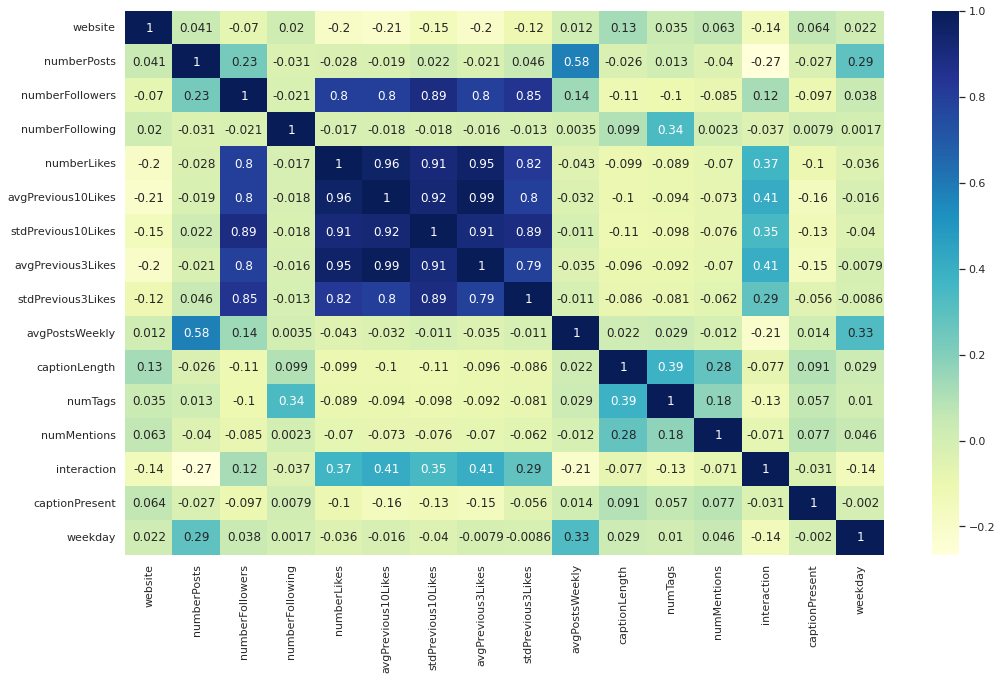

In [ ]:
plt.figure(figsize=(17,10))
heatmap = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Text(0, 0.5, 'numberLikes')

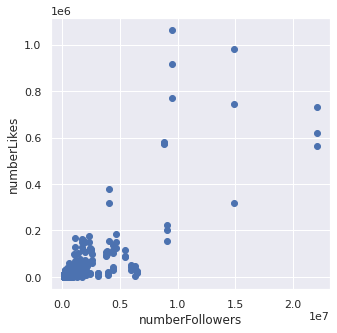

In [ ]:
#scatter plots
plt.figure(figsize=(5,5))
plt.scatter(x='numberFollowers', y='numberLikes',data=df)
plt.xlabel('numberFollowers')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

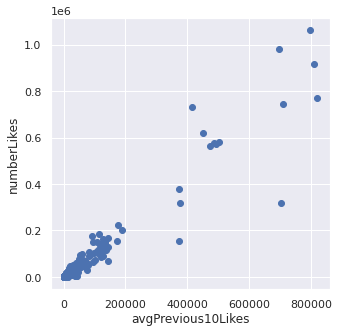

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='avgPrevious10Likes', y='numberLikes',data=df)
plt.xlabel('avgPrevious10Likes')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

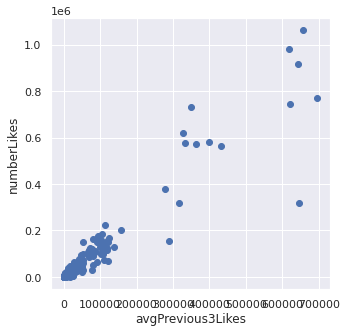

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='avgPrevious3Likes', y='numberLikes',data=df)
plt.xlabel('avgPrevious3Likes')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

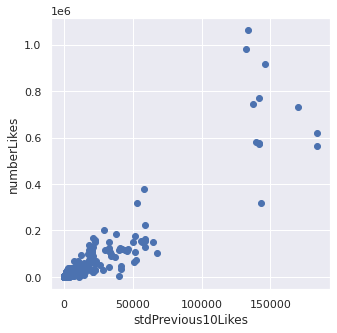

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='stdPrevious10Likes', y='numberLikes',data=df)
plt.xlabel('stdPrevious10Likes')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

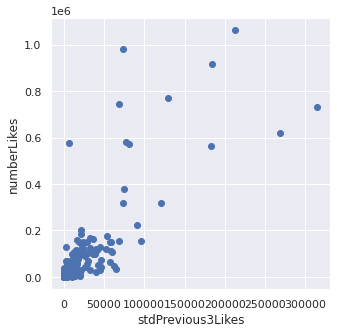

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='stdPrevious3Likes', y='numberLikes',data=df)
plt.xlabel('stdPrevious3Likes')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

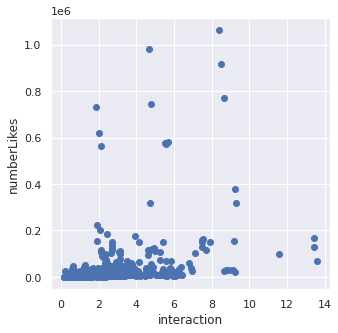

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='interaction', y='numberLikes',data=df)
plt.xlabel('interaction')
plt.ylabel('numberLikes')

Text(0, 0.5, 'numberLikes')

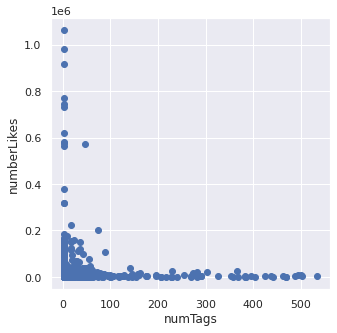

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='numTags', y='numberLikes',data=df)
plt.xlabel('numTags')
plt.ylabel('numberLikes')